In [1]:
import json
import math
import numpy as np

import matplotlib.pyplot as plt
import matplotlib
from matplotlib import font_manager, rc

import pandas as pd

In [2]:
def correlation(x, y):
    n = len(x)
    vals = range(n)
    x_sum = 0.0
    y_sum = 0.0
    x_sum_pow = 0.0
    y_sum_pow = 0.0
    mul_xy_sum = 0.0
    
    for i in vals:
        mul_xy_sum = mul_xy_sum + float(x[i]) * float(y[i])
        x_sum = x_sum + float(x[i])
        y_sum = y_sum + float(y[i])
        x_sum_pow = x_sum_pow + pow(float(x[i]), 2)
        y_sum_pow = y_sum_pow + pow(float(y[i]), 2)
        
    try:
        r = ((n * mul_xy_sum) - (x_sum * y_sum)) / math.sqrt( ((n*x_sum_pow) - pow(x_sum, 2)) * ((n*y_sum_pow) - pow(y_sum, 2)) )
    except:
        print("error")
        r = 0.0
    return r

In [3]:
def setScatterGraph(tour_table, fv_table, tourpoint):
    
    tour = tour_table[tour_table['resNm'] == tourpoint]
    merge_table = pd.merge(tour, fv_table, left_index=True, right_index=True)
    
    fig = plt.figure()
    fig.suptitle(tourpoint + '상관관계 분석')
    
    plt.subplot(1, 3, 1)
    plt.xlabel('중국인 입국수')
    plt.ylabel('외국인 입장객수')
    r1 = merge_table.china.corr(merge_table.ForNum)
    plt.title('r = {:.5f}'.format(r1))
    plt.scatter(list(merge_table['china']), list(merge_table['ForNum']), edgecolor='none', alpha=0.75, s=6, c='black')
    
    plt.subplot(1, 3, 2)
    plt.xlabel('일본인 입국수')
    plt.ylabel('외국인 입장객수')
    r2 = merge_table.japan.corr(merge_table.ForNum)
    plt.title('r = {:.5f}'.format(r2))
    plt.scatter(list(merge_table['japan']), list(merge_table['ForNum']), edgecolor='none', alpha=0.75, s=6, c='black')
    
    plt.subplot(1, 3, 3)
    plt.xlabel('미국인 입국수')
    plt.ylabel('외국인 입장객수')
    r3 = merge_table.usa.corr(merge_table.ForNum)
    plt.title('r = {:.5f}'.format(r3))
    plt.scatter(list(merge_table['usa']), list(merge_table['ForNum']), edgecolor='none', alpha=0.75, s=6, c='black')
    
    plt.show()
    return [tourpoint, r1, r2, r3]

In [4]:
def main():
    font_location = "c:/Windows/fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=font_location).get_name()
    matplotlib.rc('font', family=font_name)
    
    tpFileName = 'data/서울특별시_관광지입장정보_2011_2016.json'
    jsonTP = json.loads(open(tpFileName, 'r', encoding='utf-8').read())
    tour_table = pd.DataFrame(jsonTP, columns=('yyyymm', 'resNm', 'ForNum'))
    tour_table = tour_table.set_index('yyyymm')
    #print(tour_table)
    
    resNm = tour_table.resNm.unique()
    
    fv_CFileName = 'data/중국(112)_해외방문객정보_2011_2016.json'
    jsonFV = json.loads(open(fv_CFileName, 'r', encoding='utf-8').read())
    china_table = pd.DataFrame(jsonFV, columns=('yyyymm', 'visit_cnt'))
    china_table = china_table.rename(columns={'visit_cnt' : 'china'})
    china_table = china_table.set_index('yyyymm')
    
    fv_JFileName = 'data/일본(130)_해외방문객정보_2011_2016.json'
    jsonFV = json.loads(open(fv_JFileName, 'r', encoding='utf-8').read())
    japan_table = pd.DataFrame(jsonFV, columns=('yyyymm', 'visit_cnt'))
    japan_table = japan_table.rename(columns={'visit_cnt' : 'japan'})
    japan_table = japan_table.set_index('yyyymm')
    
    fv_UFileName = 'data/미국(275)_해외방문객정보_2011_2016.json'
    jsonFV = json.loads(open(fv_UFileName, 'r', encoding='utf-8').read())
    usa_table = pd.DataFrame(jsonFV, columns=('yyyymm', 'visit_cnt'))
    usa_table = usa_table.rename(columns={'visit_cnt' : 'usa'})
    usa_table = usa_table.set_index('yyyymm')
    
    fv_table = pd.merge(china_table, japan_table, left_index=True, right_index=True)
    fv_table = pd.merge(fv_table, usa_table, left_index=True, right_index=True)
    print(fv_table)
    
    r_list = []
    for tourpoint in resNm:
        r_list.append(setScatterGraph(tour_table, fv_table, tourpoint))

         china   japan    usa
yyyymm                       
201101   91252  209184  43065
201102  140571  230362  41077
201103  141457  306126  54610
201104  147680  239075  59616
201105  154066  241695  59780
...        ...     ...    ...
201608  513275  148632  63522
201609  591242  157313  63793
201610  650174  180348  77878
201611  507579  164685  62273
201612  465218  159877  57580

[72 rows x 3 columns]


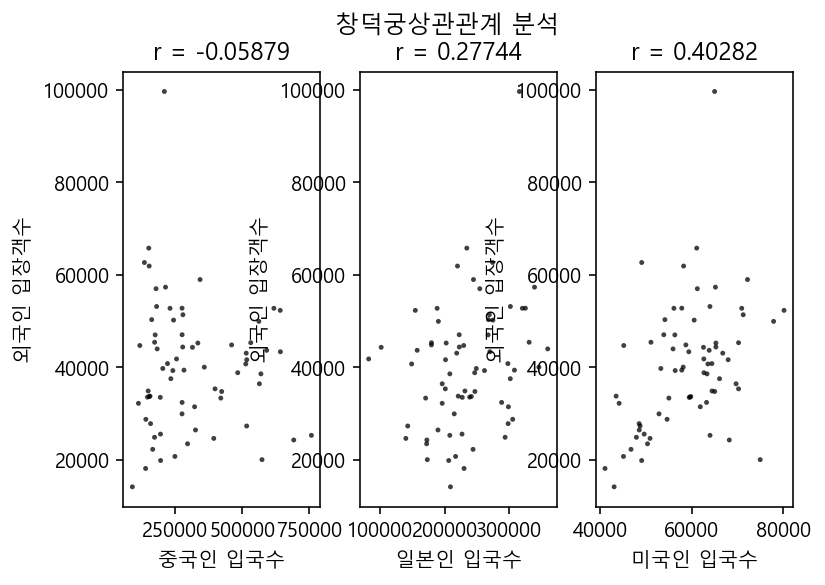

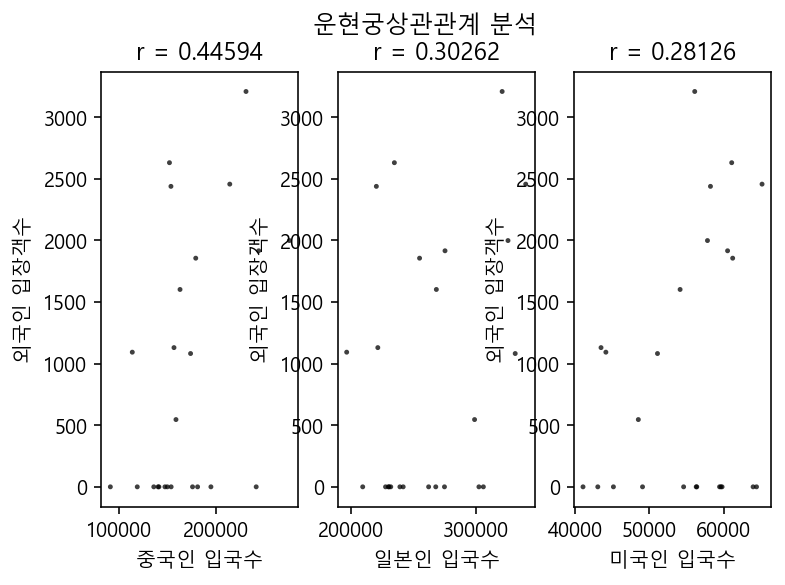

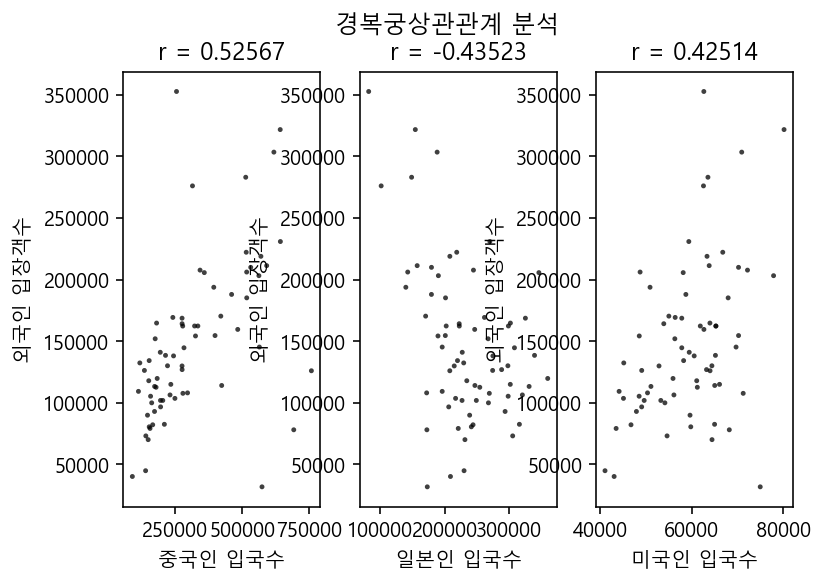

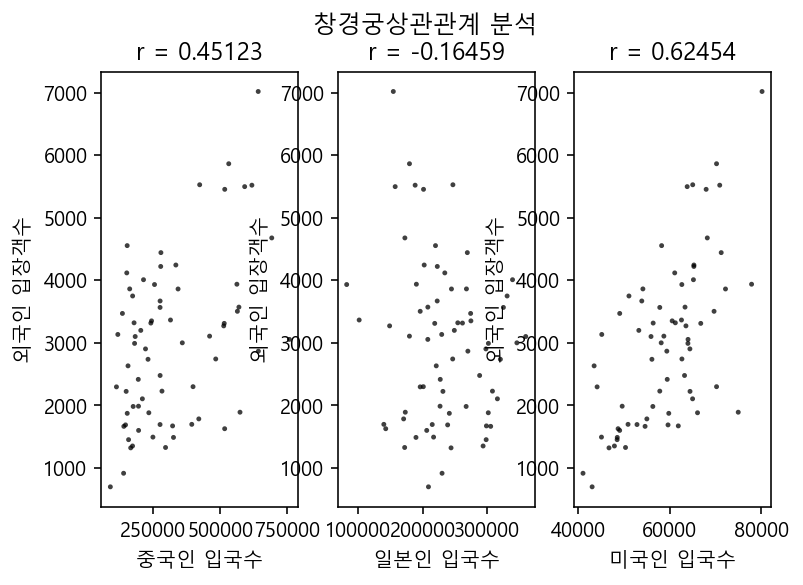

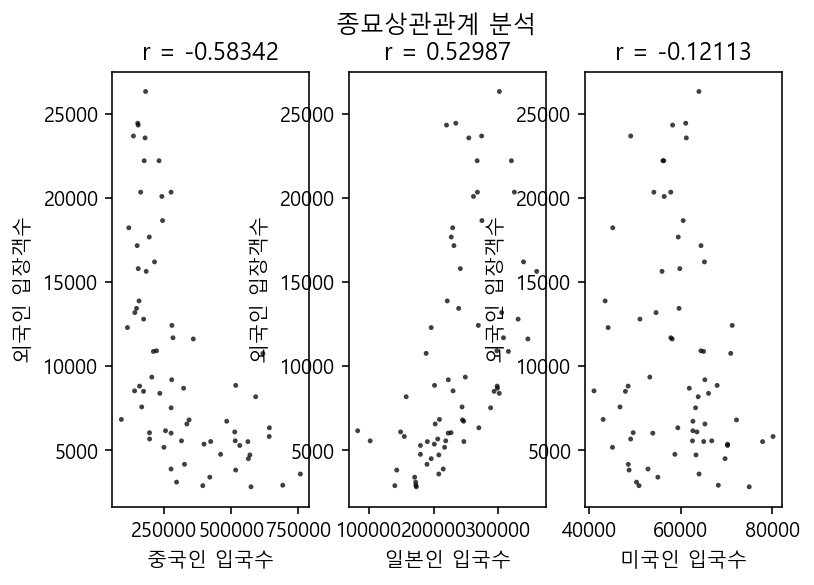

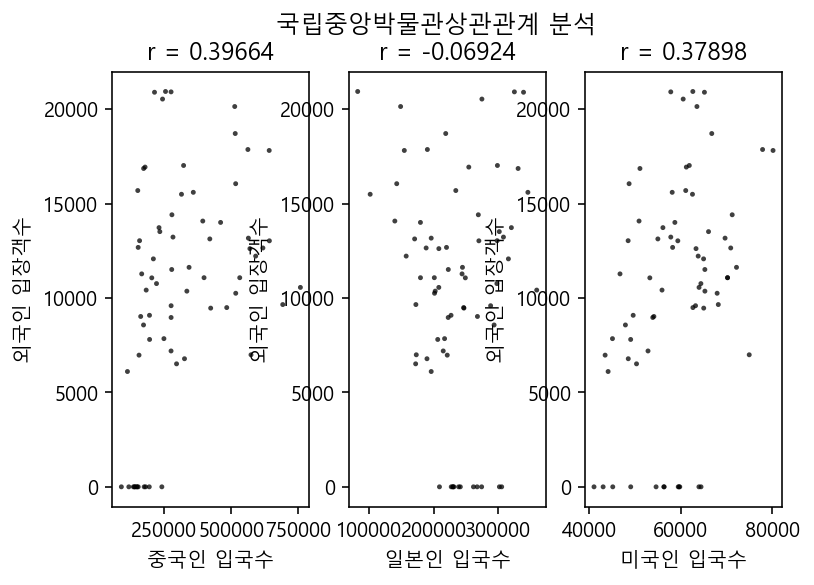

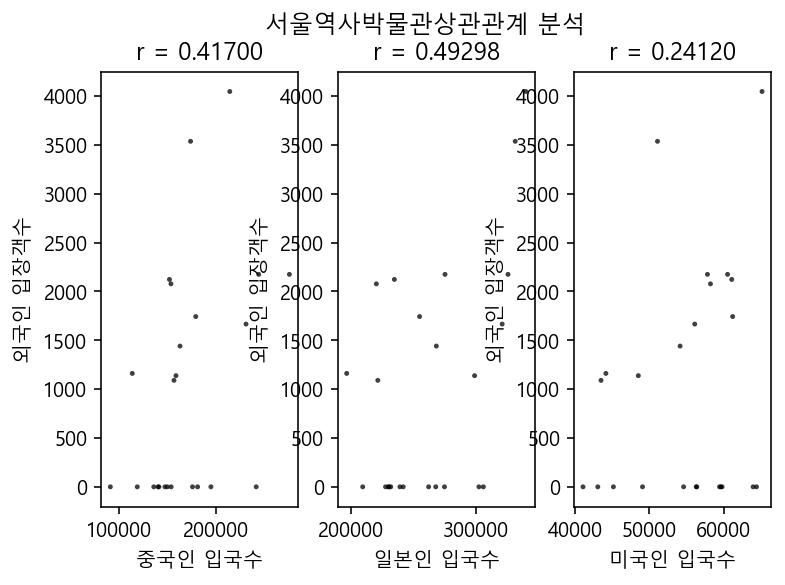

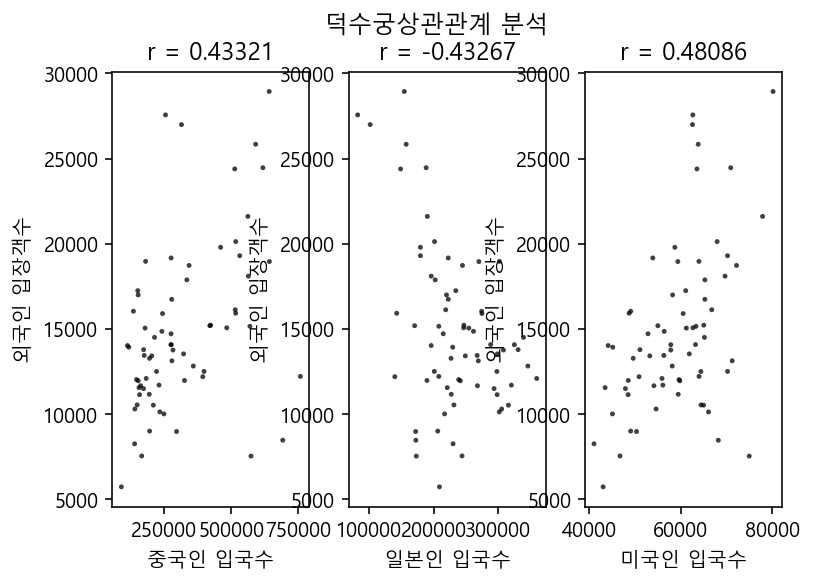

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


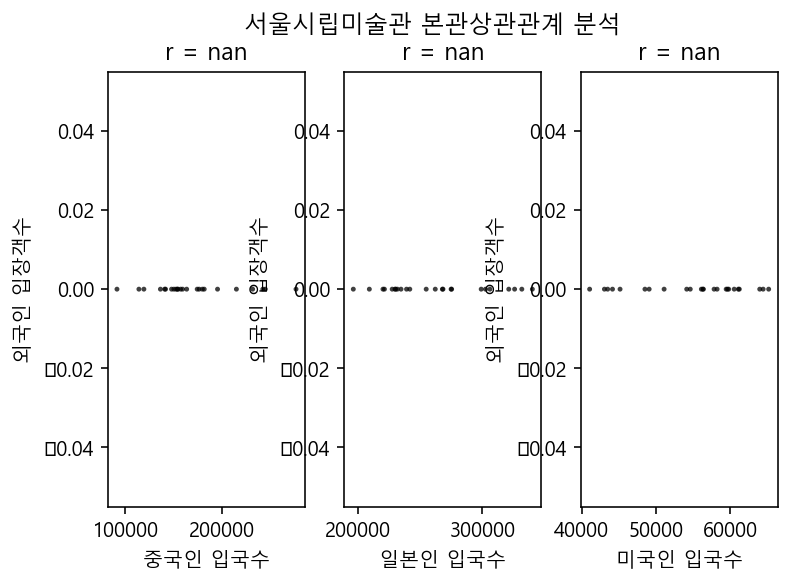

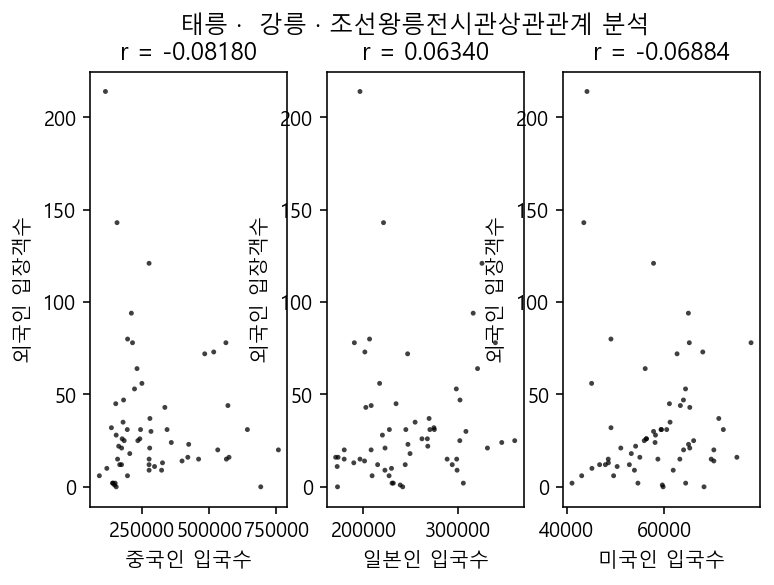

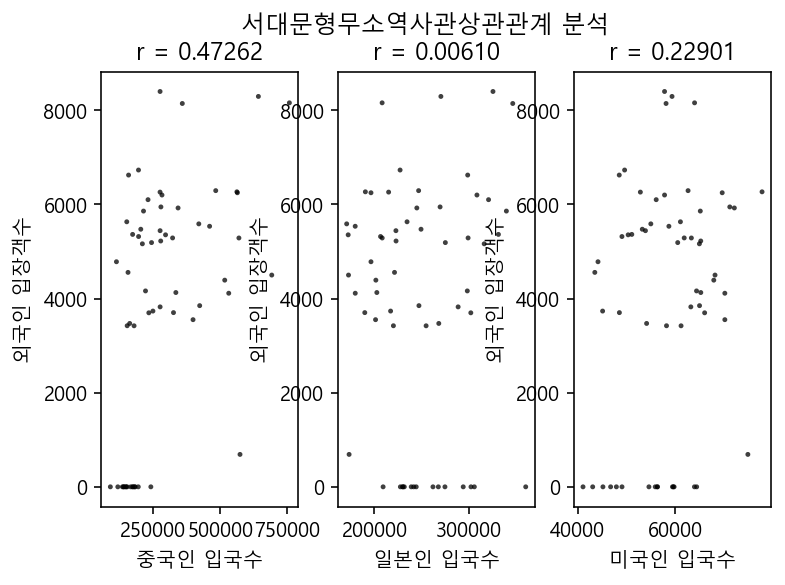

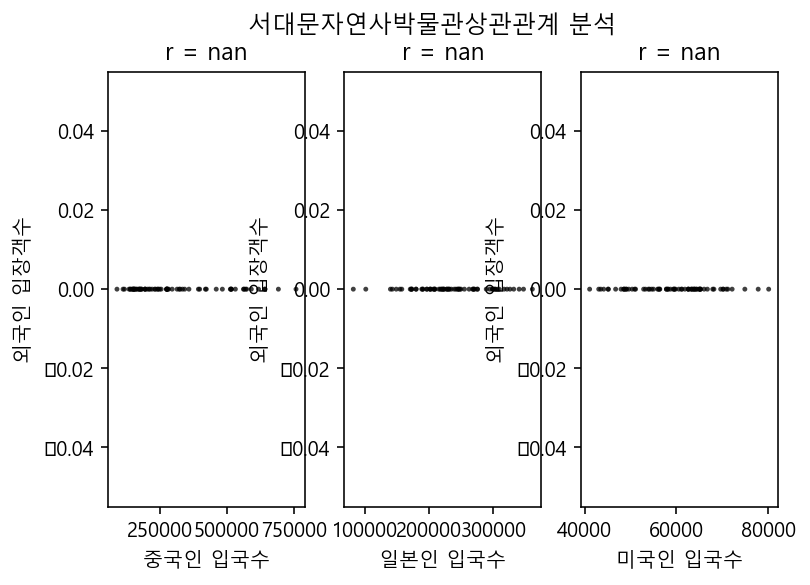

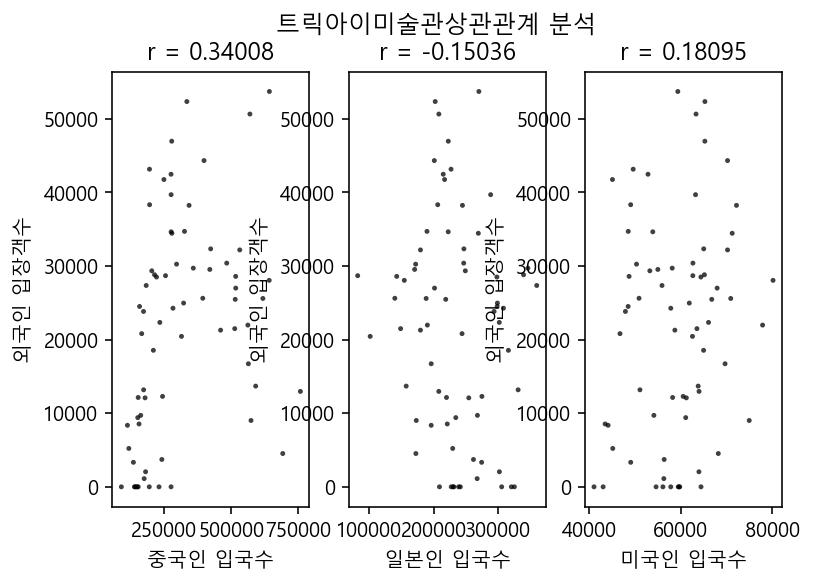

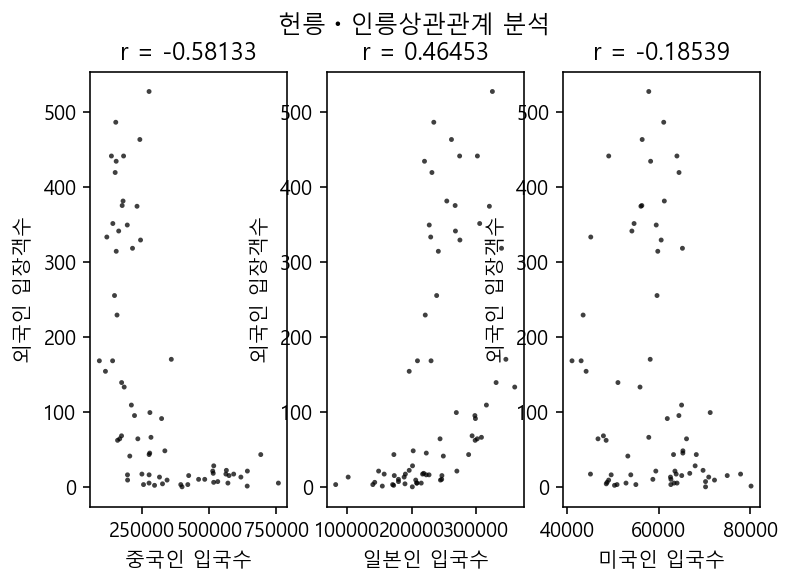

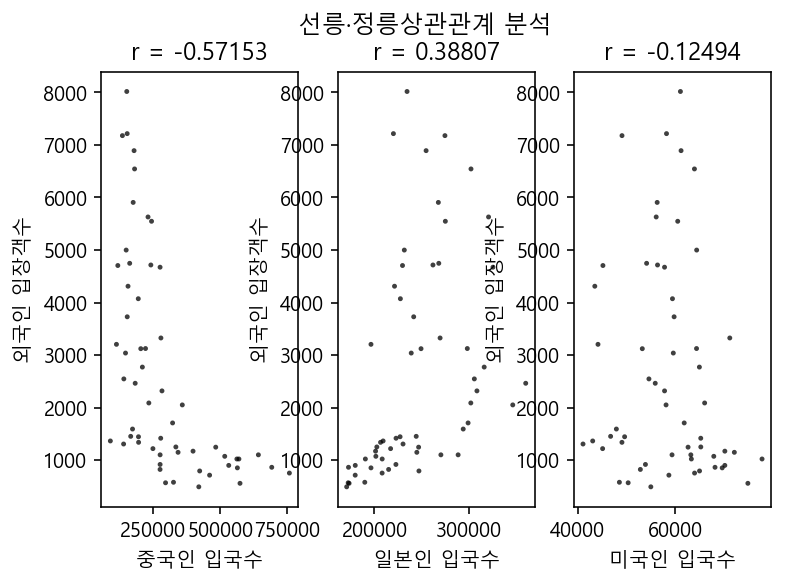

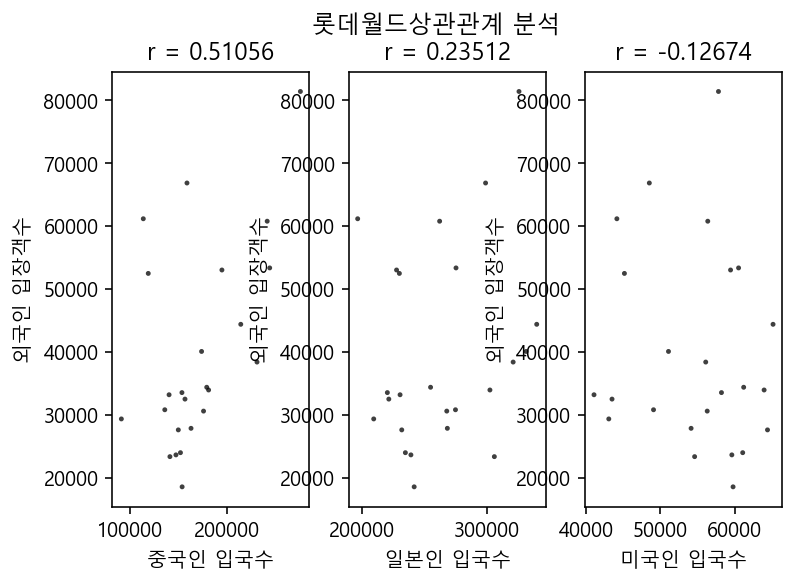

In [5]:
main()